# **Importing Libraries**

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Downloading Dataset from Kaggle**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shahriarkabir/abc-xyz-inventory-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 24.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shahriarkabir/abc-xyz-inventory-classification-dataset/versions/1


# **Loading Dataset**

In [3]:
df  = pd.read_csv("/root/.cache/kagglehub/datasets/shahriarkabir/abc-xyz-inventory-classification-dataset/versions/1/abc_xyz_dataset.csv")
df.head(5)

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


# **Revisamos el tipo de datos de cada columna**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

# **Verificamos si tenemos valores nulos**

In [7]:
df.isnull().sum()

,0
Item_ID,0
Item_Name,0
Category,0
Jan_Demand,0
Feb_Demand,0
Mar_Demand,0
Apr_Demand,0
May_Demand,0
Jun_Demand,0
Jul_Demand,0


# **Verificamos si tenemos valores duplicados**

In [10]:
df.duplicated().sum()

np.int64(0)

# **Desechamos la columna Item_ID ya que no proporciona ninguna información**

In [11]:
df.drop(columns="Item_ID", inplace=True)

# **Verificamos qué variables no son enteras**

In [12]:
df.describe(exclude="int")

,Item_Name,Category
count,1000,1000
unique,1000,5
top,Table Actually,Grocery
freq,1,402


# **Contamos cuántos elementos tenemos en la columna Category**

In [17]:
cat = df.Category.value_counts()
cat

,count
Category,
Grocery,402
Apparel,216
Electronics,193
Home & Kitchen,100
Toys,89


In [15]:
df.Category.unique()

array(['Grocery', 'Apparel', 'Toys', 'Electronics', 'Home & Kitchen'],
      dtype=object)

# **Gráfica de la columna Category**

In [20]:
fig = px.bar(cat, x=cat.index, y=cat.values, color=cat.index, title="Distribución de las categorías")
fig.show()

# **Análisis por columnas**

In [47]:
ItemName_price_per_unit = df.groupby("Item_Name")["Price_Per_Unit"].sum()
ItemName_price_per_unit.head(3)

,Price_Per_Unit
Item_Name,
Able Develop,100
About No,2
About Response,100


In [60]:
ItemName_total_anual_units = df.groupby("Item_Name")["Total_Annual_Units"].sum()
ItemName_total_anual_units.head(3)

,Total_Annual_Units
Item_Name,
Able Develop,34344
About No,3543
About Response,58307


# **Análisis de Ganancias**

In [28]:
df.head()

,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [24]:
category_sales = df.groupby("Category")["Total_Sales_Value"].sum()
category_sales

,Total_Sales_Value
Category,
Apparel,99381360
Electronics,25081150
Grocery,911737236
Home & Kitchen,14143006
Toys,21945148


In [51]:
category_sales.index

Index(['Apparel', 'Electronics', 'Grocery', 'Home & Kitchen', 'Toys'], dtype='object', name='Category')

In [52]:
category_sales.values

array([ 99381360,  25081150, 911737236,  14143006,  21945148])

In [55]:
fig = px.bar(category_sales, x=category_sales.index, y=category_sales.values, color=category_sales.index, title="Ventas por categoria")
fig.show()

In [63]:
Item_category_sales = df.groupby(["Item_Name", "Category"])["Total_Sales_Value"].sum()
Item_category_sales.head()

,,Total_Sales_Value
Item_Name,Category,
Able Develop,Grocery,3434400
About No,Toys,7086
About Response,Grocery,5830700
According Off,Apparel,5733500
According Offer,Apparel,8568


In [64]:
Item_category_sales = Item_category_sales.reset_index()
Item_category_sales

,Item_Name,Category,Total_Sales_Value
0,Able Develop,Grocery,3434400
1,About No,Toys,7086
2,About Response,Grocery,5830700
3,According Off,Apparel,5733500
4,According Offer,Apparel,8568
...,...,...,...
995,Yes Try,Apparel,123240
996,Yet Save,Grocery,83140
997,You Claim,Electronics,3246
998,Your Different,Electronics,8766


In [65]:
Item_category_sales = Item_category_sales.sort_values("Total_Sales_Value", ascending=False)
Item_category_sales

,Item_Name,Category,Total_Sales_Value
850,Ten And,Grocery,59462000
679,Radio Race,Grocery,47606000
608,Pattern Book,Grocery,37136000
45,Animal Key,Grocery,29804500
480,Material Vote,Grocery,28431000
...,...,...,...
407,Investment Agreement,Electronics,1512
37,Along Have,Home & Kitchen,1456
397,Indicate Organization,Home & Kitchen,1396
984,Worry Because,Toys,1290


In [66]:
Top_10_item_sales = Item_category_sales.head(10)
Top_10_item_sales

,Item_Name,Category,Total_Sales_Value
850,Ten And,Grocery,59462000
679,Radio Race,Grocery,47606000
608,Pattern Book,Grocery,37136000
45,Animal Key,Grocery,29804500
480,Material Vote,Grocery,28431000
347,Health Hundred,Grocery,27658500
810,Station Recent,Grocery,26364000
479,Material Leg,Grocery,26322000
582,Opportunity Rock,Grocery,24492500
969,With Behavior,Grocery,22361000


In [69]:
fig = px.bar(Top_10_item_sales, x="Item_Name", y="Total_Sales_Value", color="Category", title="Top 10 productos más vendidos")
fig.show()

In [72]:
Item_category_demand = df.groupby(["Item_Name", "Category"])["Total_Annual_Units"].sum()
Item_category_demand.head(3)

,,Total_Annual_Units
Item_Name,Category,
Able Develop,Grocery,34344
About No,Toys,3543
About Response,Grocery,58307


In [73]:
Item_category_demand = Item_category_demand.reset_index()
Item_category_demand.head(3)

,Item_Name,Category,Total_Annual_Units
0,Able Develop,Grocery,34344
1,About No,Toys,3543
2,About Response,Grocery,58307


In [75]:
Item_category_demand = Item_category_demand.sort_values("Total_Annual_Units", ascending=False)
Item_category_demand.head(3)

,Item_Name,Category,Total_Annual_Units
432,Lay Building,Grocery,59967
193,Decide Clear,Grocery,59814
445,Light Sport,Grocery,59639


In [76]:
Top_10_items_demand = Item_category_demand.head(10)
Top_10_items_demand

,Item_Name,Category,Total_Annual_Units
432,Lay Building,Grocery,59967
193,Decide Clear,Grocery,59814
445,Light Sport,Grocery,59639
45,Animal Key,Grocery,59609
186,Customer Yet,Grocery,59570
850,Ten And,Grocery,59462
945,What Friend,Grocery,59303
215,Draw Clear,Grocery,59258
487,Measure Work,Grocery,58891
816,Store Wear,Grocery,58818


In [77]:
fig = px.bar(Top_10_items_demand, x="Item_Name", y="Total_Annual_Units", color="Category", title="Top 10 productos más demandados")
fig.show()

# **Demanda promedio mensual**

In [82]:
monthly_cols = [col for col in df.columns]
monthly_cols

['Item_Name',
 'Category',
 'Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand',
 'Total_Annual_Units',
 'Price_Per_Unit',
 'Total_Sales_Value']

In [83]:
monthly_cols = [col for col in df.columns if '_Demand' in col]
monthly_cols

['Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand']

<Figure size 1600x400 with 0 Axes>

In [85]:
monthly_avg_demand = df[monthly_cols].mean()
monthly_avg_demand

,0
Jan_Demand,1418.515
Feb_Demand,1418.394
Mar_Demand,1421.239
Apr_Demand,1409.242
May_Demand,1411.762
Jun_Demand,1412.853
Jul_Demand,1410.558
Aug_Demand,1403.721
Sep_Demand,1411.109
Oct_Demand,1411.700


<Axes: title={'center': 'Demanda Mensual Promedio'}>

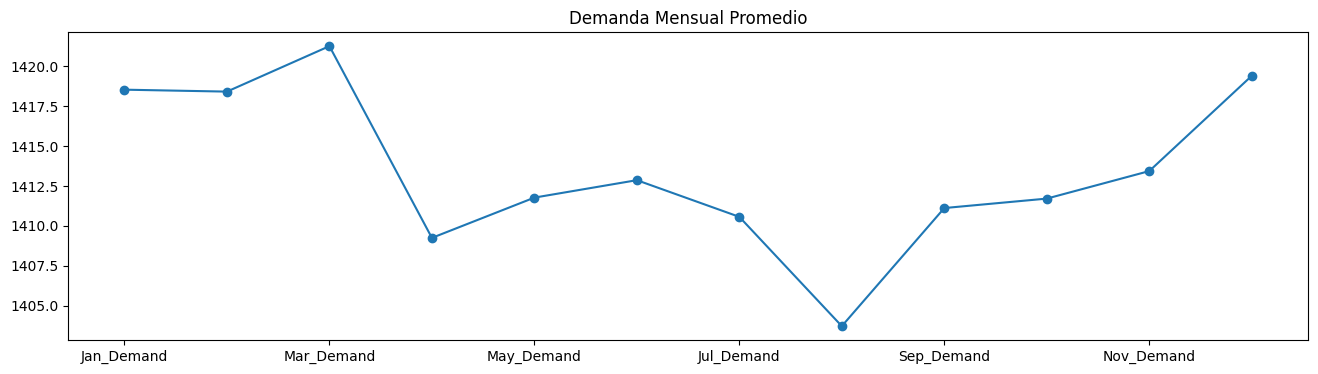

In [87]:
plt.figure(figsize=(16,4))
monthly_avg_demand.plot(kind='line', marker='o', title="Demanda Mensual Promedio")